## Display the xml element tree

In [ ]:
from pptlayout.extractors.run_extractors import run_extractors
from json import dumps
# Replace with your actual PPTX file path
pptx_path = "/data/tianyuhu/PPTLayout/data/pptx/ZK7FNUZ33GBBCG7CFVYS56TQCTD72CJR.pptx"

# Run extractors
info = run_extractors(pptx_path, "emu")
print(dumps(info, indent=4))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Load the image using OpenCV
image_path = '/data/tianyuhu/PPTLayout/notebooks/test_input/image.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

image_width = image.shape[1]
image_height = image.shape[0]

slide_width = 720
slide_height = 540
scale_x = slide_width / image_width
scale_y = slide_height / image_height

# Create a figure and display the image
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.imshow(image)

# Overlay grids
ax.grid(color='green', linestyle='--', linewidth=0.5)  # Customize grid color and style
interval_num = 20
x_tick_interval = image_width // interval_num
y_tick_interval = image_height // interval_num

# Customize axis ticks and labels
# Set the tick positions based on the image size
ax.set_xticks(np.arange(0, image_width, x_tick_interval))
ax.set_yticks(np.arange(0, image_height, y_tick_interval))

# Set tick labels based on the slide size
ax.set_xticklabels(np.round(np.arange(0, slide_width, x_tick_interval * scale_x), 2))
ax.set_yticklabels(np.round(np.arange(0, slide_height, y_tick_interval * scale_y), 2))
ax.xaxis.tick_top()

# Set the ticks on the horizontal axis to 45 degrees
plt.xticks(rotation=45)

# Show axes
ax.set_axis_on()
plt.savefig('/data/tianyuhu/PPTLayout/notebooks/test_input/image_grid.png')

# Display the image with the overlay
plt.show()


## test

In [1]:
from pptlayout.extractors.run_extractors import run_extractors
from pptlayout.llm.prompts import build_slide_layout_suggestion_prompts
import os
# Replace with your actual PPTX file path
pptx_path = "/data/tianyuhu/PPTLayout/data/pptx/ZK7FNUZ33GBBCG7CFVYS56TQCTD72CJR.pptx"

# Run extractors
info = run_extractors(pptx_path, "pt")
# print(dumps(info, indent=4))

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
test_image = "/data/tianyuhu/PPTLayout/notebooks/test_input/image_grid.jpg"
prompt = """You are an AI specialized in slide design improvement. Given the following JSON input representing the current slide layout, generate a visually appealing and improved slide design, considering best practices for slide layout and design balance. Maintain the semantic meaning of the content and adjust the positioning and sizes of shapes to enhance clarity and aesthetics.

{}

Instructions:
- Consider the image input that contains the screenshot of the slide.
- Optimize the layout for readability and aesthetics.
- Maintain logical grouping of related elements.
- Propose adjustments to align shapes and text properly.
- Suggest changes to colors or styles if necessary.
""".format(info["slides"][4])
# prompt = "This is a slide from a presentation. The json form of the slide is {}. What can be improved in the layout of the slide and how? Give me some specific suggestions on how to improve the layout of the slide.".format(info["slides"][4])
print(prompt)

You are an AI specialized in slide design improvement. Given the following JSON input representing the current slide layout, generate a visually appealing and improved slide design, considering best practices for slide layout and design balance. Maintain the semantic meaning of the content and adjust the positioning and sizes of shapes to enhance clarity and aesthetics.

{'slide_id': 260, 'slide_name': '', 'shapes': [{'name': 'PlaceHolder 1', 'shape_id': 38, 'shape_type': 'PLACEHOLDER', 'measurement_unit': 'pt', 'height': 42.00944881889764, 'width': 510.0094488188976, 'left': 119.99055118110236, 'top': 11.990551181102362, 'text': 'NuMI baffle as prototype of target', 'placeholder_type': 'TITLE'}, {'name': 'Rectangle 38', 'shape_id': 39, 'shape_type': 'AUTO_SHAPE', 'measurement_unit': 'pt', 'height': 60.00944881889764, 'width': 180.0, 'left': 47.99055118110236, 'top': 432.0, 'text': ''}, {'name': 'Rectangle 39', 'shape_id': 40, 'shape_type': 'AUTO_SHAPE', 'measurement_unit': 'pt', 'heig

In [2]:
from pptlayout.llm.llm import generate_slide_layout
# suggestion = generate_slide_layout(
#     model_name="Qwen2-VL-7B-Instruct",
#     prompt=prompt,
#     images=[test_image],
#     # json=True,
#     ) 
# print(suggestion)
# print("#" * 50)
# prompt = build_slide_layout_suggestion_prompts(
#     json_input=info["slides"][4],
#     slide_width=info["slide_width"],
#     slide_height=info["slide_height"],
#     # suggestion=suggestion,
#     )
response = generate_slide_layout(
    model_name="Qwen2-VL-7B-Instruct",
    prompt=prompt,
    images=[test_image],
    # json=True,
    )

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
print(response)

['Here is a proposed improvement for the slide design:\n\n1. **Remove the placeholder shapes**:\n   - The "PlaceHolder 1" and "PlaceHolder 2" can be removed as they are not necessary for the content.\n\n2. **Adjust the text and image placement**:\n   - Move the text "NuMI baffle as prototype of target" to the top of the slide, centered.\n   - Place the image of the NuMI baffle in the center of the slide, slightly above the text.\n   - Adjust the text "Graphite is good in compression, poor in tension, so put pre-stress at outer radius by encapsulating in aluminum or steel" to be centered below the image.\n   - Place the text "Existing NuMI baffle is 1.5 m long, 6 cm diameter graphite encapsulated in aluminum" and "Target would be 1 m long, 1.5 cm diameter – not too different from our baffle; get rid of air cooling fins, add water cooling tubes" below the image, aligned to the left.\n\n3. **Adjust the text and image sizes**:\n   - Increase the font size of the title to make it more promi

In [5]:
from pptlayout.llm.parser import extract_json
from json import dumps
# Extract JSON data
json_data = extract_json(response[0])
print(dumps(json_data, indent=4))

{   "slide_id": 260,   "slide_name": "",   "shapes": [     {       "name": "NuMI baffle as prototype of target",       "shape_id": 38,       "shape_type": "PLACEHOLDER",       "measurement_unit": "pt",       "height": 42.00944881889764,       "width": 510.0094488188976,       "left": 119.99055118110236,       "top": 11.990551181102362,       "text": "NuMI baffle as prototype of target",       "placeholder_type": "TITLE"     },     {       "name": "Picture 41",       "shape_id": 42,       "shape_type": "PICTURE",       "measurement_unit": "pt",       "height": 264.2456692913386,       "width": 515.9905511811023,       "left": 137.99055118110238,       "top": 65.76377952755905,       "auto_shape_type": "RECTANGLE"     },     {       "name": "Text 43",       "shape_id": 44,       "shape_type": "TEXT_BOX",       "measurement_unit": "pt",       "height": 93.79842519685039,       "width": 690.6047244094489,       "left": 39.20314960629921,       "top": 396.0,       "text": "Existing NuMI baf

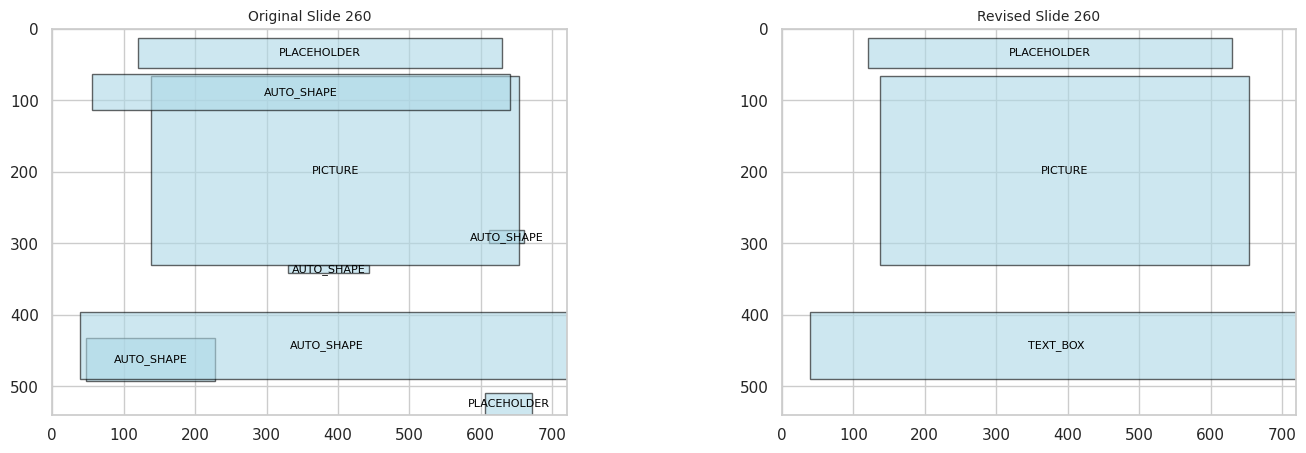

In [6]:
from pptlayout.visualizers.layout_visualizer import generate_comparison_grid

generate_comparison_grid(
    [info["slides"][4]],
    [json_data],
    slide_width=info["slide_width"],
    slide_height=info["slide_height"]
    )
    